## EDA US accidents (2016-21)


## Data Prep and Cleaning
- starting first by cleaning the data and finding the missing values

In [ ]:
import pandas as pd

In [ ]:
Filepath = '/content/drive/MyDrive/Datasets/US_Accidents_Dec21_updated.csv'
df = pd.read_csv(Filepath)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

Percentage of missing values per column

In [ ]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

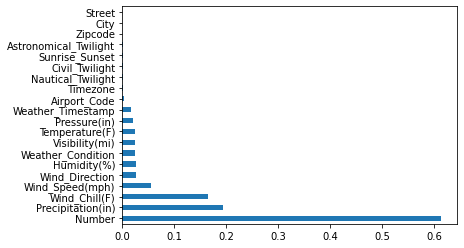

In [ ]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

## Data analysing and visualization 

Feature selection and further Feature analysis

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

Selected areas of interest that are further explored :
1. City
2. Start_Time
3. Latitude and Longitude

### City column Analysis

In [ ]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [ ]:
cities = df.City.unique()
len(cities)

11682

In [ ]:
cities_by_accident = df.City.value_counts()
cities_by_accident[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

It is known that New York is one of the most densely populated state yet it does not show up in the top 20 cities by accident.
Continuing the analysis after checking if New york's data exists?

In [ ]:
'NY' in df.State

False

New York's Data Does not exist

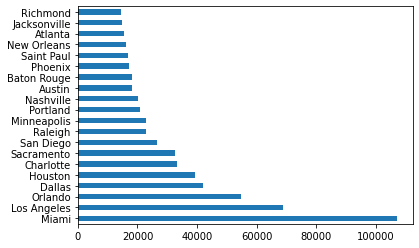

In [ ]:
cities_by_accident[:20].plot(kind='barh')


In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

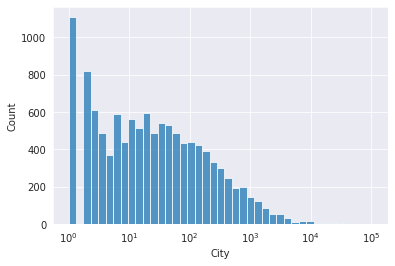

In [ ]:
sns.histplot(cities_by_accident, log_scale=True)

In [ ]:
cities_by_accident[cities_by_accident == 1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

Might contain inaccurate data since more than 1100 cities reported only 1 accident

### Start Time Analysis

In [ ]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


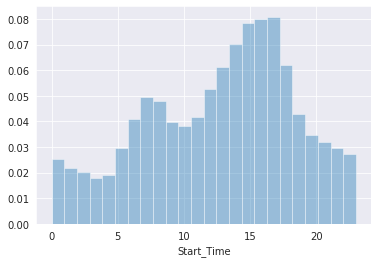

In [ ]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)


We can observe that the majority of accidents take place usually between 1 p.m. to 6 p.m.

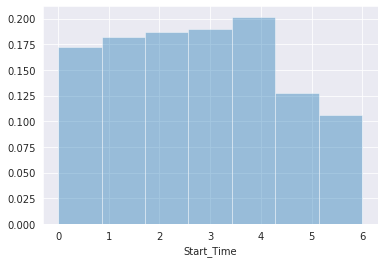

In [ ]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

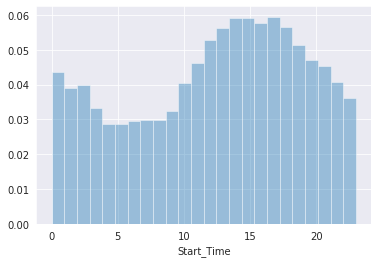

In [ ]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

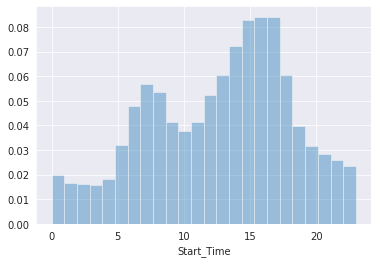

In [ ]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)


After analysing the trends between accidents occuring on sunday and monday, it can be stated that on sundays the accidents are evenly spread throughout the day with peak occuring at 12 pm to 9 pm, whereas on Mondays the accidents occur predominantly in the morning and evening office commute hours.

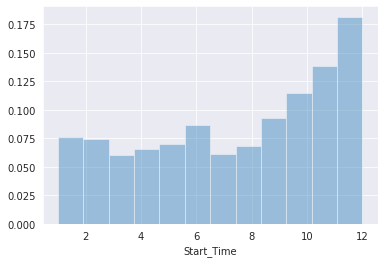

In [ ]:
sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

From the above histogram we can see that there is a huge discrepancy when it comes to accidents taking place at the start of the year vs the end of the year.
Lets Investigate :

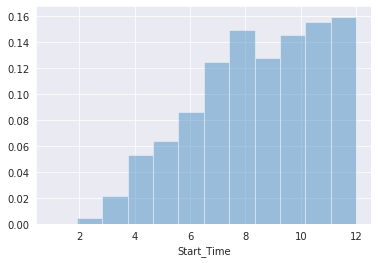

In [ ]:
df_year = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_year.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)


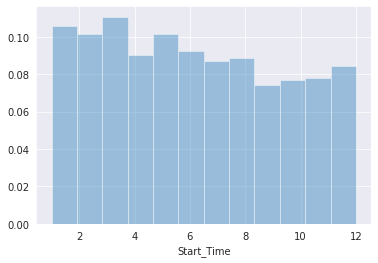

In [ ]:
df_year = df[df.Start_Time.dt.year == 2017]
sns.distplot(df_year.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

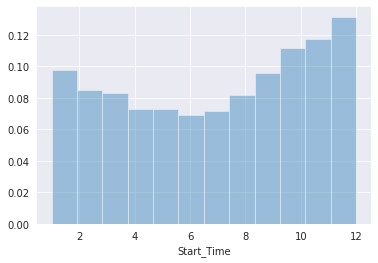

In [ ]:
df_year = df[df.Start_Time.dt.year == 2018]
sns.distplot(df_year.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

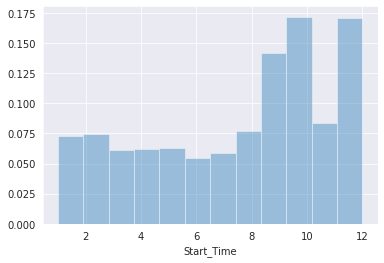

In [ ]:
df_year = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_year.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

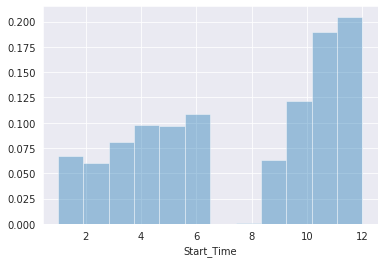

In [ ]:
df_year = df[df.Start_Time.dt.year == 2020]
sns.distplot(df_year.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

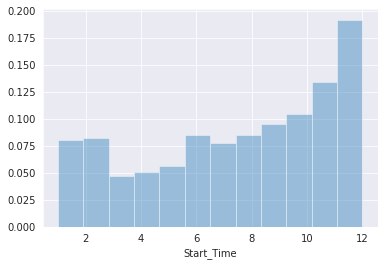

In [ ]:
df_year = df[df.Start_Time.dt.year == 2021]
sns.distplot(df_year.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

From the above 5 graphs, we can clearly observe that there is a huge chunk of missing data from the years 2016, 2020, 2021 and some in 2019 as well.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


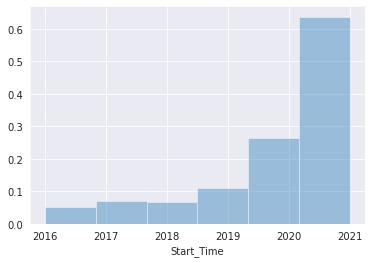

In [ ]:
sns.distplot(df.Start_Time.dt.year, bins=6, kde=False, norm_hist=True)


The Graph suggests that there has been massive uptake in the overall number of accidents but, it has already been proved that the data is missing huge chunks of information, henceforth it completely invalidates this conclusion. 

### Latitude and Longitude Analysis

In [ ]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [ ]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

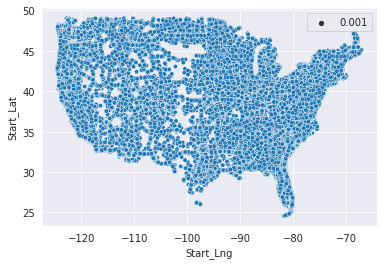

In [ ]:
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat, size=0.001)

When plotting the complete data points the map becomes unclear, though we can still draw inferences from it, it is better to reduce the dataframe to sample size

In [ ]:
sample_df = df.sample(int(0.1 * len(df)))

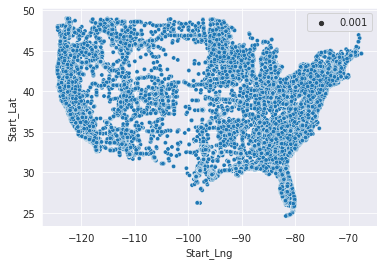

In [ ]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

Here we can clearly observe that the majority of accidents take place in the coastal region where the densely populated states reside

In [ ]:
import folium

In [ ]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(40.10891, -83.09286)

In [ ]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

2502842    44.789800
1369934    38.661085
1426955    41.912401
1252463    38.953431
839570     40.520558
             ...    
1945481    40.229617
1795149    35.116846
1735572    34.055001
292350     37.313851
1761518    32.352598
Name: Start_Lat, Length: 100, dtype: float64
2502842   -123.036400
1369934   -121.368985
1426955    -72.630969
1252463    -76.965655
839570     -76.095734
              ...    
1945481    -76.432526
1795149    -85.354338
1735572   -117.299073
292350     -80.056675
1761518    -86.173109
Name: Start_Lng, Length: 100, dtype: float64


In [ ]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [ ]:
from folium.plugins import HeatMap

In [ ]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [ ]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

## Drawing Inferences and asking questions

### Questions:



1. Which 5 cities have the highest number of accidents? - ANSWERED
2. What time of the day are accidents most frequent in? - ANSWERED
3. Which days of the week have the most accidents? - ANSWERED
4. Which months have the most accidents? - ANSWERED
5. What is the trend of accidents (decreasing/increasing?) - ANSWERED 

###Inferences:



1. Miami, Los Angeles, Orlando, Dallas, Houston  
2. We can observe that the majority of accidents take place usually between 1 p.m. to 6 p.m.
3. It is observed that most accidents occur on friday while monday to friday in total has the highest frequency of accidents in the whole week.
4. The Frequency of accidents taking place in between November to December is comparatively higher but since it is observed that there is a massive lack of data, this conclusion is invalid
5. The Graph suggests that there has been massive uptake in the overall number of accidents but, it has already been proved that the data is missing huge chunks of information, henceforth it completely invalidates this conclusion.

## Summary and Conclusion



Insights: 

1. No data from New York
2. From the histogram plotted on cities by accident, we can concur that less than 5% of cities report more than 1000 accidents per year
3. There is reason to belive that the data might be incorrect since over 1100 cities have reported only 1 accident
4. Large amount of data is found missing from the years 2016, 2019, 2020 and 2021 that is causing anomalies in the accidents per month graph